#### This is the code for analysis test, I added a few comments and did analysis

#### Note :  If you want the 'Final Analysis report' you can directly look at the Report that I submitted

In [1]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import *
import seaborn as sns
# for removing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the DAU data
XYZ_DAU_data = pd.read_excel('XYZ_Pjct_Data.xlsx',sheet_name ='DAU')
XYZ_DAU_data.head()

,Date,Median time played,Daily Active Users (DAU),Total Quests Completed
0,2026-02-05,2665.02,75195.0,84519.0
1,2026-02-06,2641.02,73607.0,80871.0
2,2026-02-07,2630.28,91883.0,99739.0
3,2026-02-08,2747.46,89325.0,104582.0
4,2026-02-09,2656.20,60347.0,70409.0


In [3]:
# Loading the Revenue data
XYZ_Revenue_data = pd.read_excel('XYZ_Pjct_Data.xlsx',sheet_name ='Revenues')
XYZ_Revenue_data.head()

,Week_Start,Units Sold - Game,Units Sold - DLCs and MTXs,Rev_Game,Rev_DLCs and MTXs,Total_revenues,Unnamed: 6,Unnamed: 7
0,2026-02-05,246968,61742.0,4914663.2,558392.800000,5.473056e+06,NaN,NaN
1,2026-02-12,161529,42939.0,3214427.1,391750.900000,3.606178e+06,NaN,NaN
2,2026-02-19,136517,40778.0,2716688.3,368795.011474,3.085483e+06,NaN,NaN
3,2026-02-26,84750,26764.0,1686525.0,280110.000000,1.966635e+06,NaN,NaN
4,2026-03-05,72621,25516.0,1445157.9,262348.100000,1.707506e+06,NaN,NaN


In [4]:
# dropping the unnecessary columns
XYZ_Revenue_data.drop(['Unnamed: 6','Unnamed: 7'], axis = 1, inplace = True)

In [5]:
XYZ_Revenue_data.head()

,Week_Start,Units Sold - Game,Units Sold - DLCs and MTXs,Rev_Game,Rev_DLCs and MTXs,Total_revenues
0,2026-02-05,246968,61742.0,4914663.2,558392.800000,5.473056e+06
1,2026-02-12,161529,42939.0,3214427.1,391750.900000,3.606178e+06
2,2026-02-19,136517,40778.0,2716688.3,368795.011474,3.085483e+06
3,2026-02-26,84750,26764.0,1686525.0,280110.000000,1.966635e+06
4,2026-03-05,72621,25516.0,1445157.9,262348.100000,1.707506e+06


In [6]:
# shapes of the data. You can see that the data is not that big
print(XYZ_DAU_data.shape)
print(XYZ_Revenue_data.shape)

(594, 4)
(85, 6)


#### Found no null values

In [7]:
# Checking for null values in data sets

XYZ_DAU_data.info() 
print("----------------------------------------------")

XYZ_Revenue_data.info()
print("----------------------------------------------")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      594 non-null    datetime64[ns]
 1   Median time played        594 non-null    float64       
 2   Daily Active Users (DAU)  594 non-null    float64       
 3   Total Quests Completed    594 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 18.7 KB
----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Week_Start                  85 non-null     datetime64[ns]
 1   Units Sold - Game           85 non-null     int64         
 2   Units Sold - DLCs and MTXs  85 non-null     float64   

#### You can see the average 'Daily Active Users (DAU)' is 53,322 per day and average 'Total Quests Completed' is 139,360

In [8]:
# For better understanding the data
XYZ_DAU_data.describe()

,Median time played,Daily Active Users (DAU),Total Quests Completed
count,594.000000,594.000000,594.000000
mean,4994.771771,53322.587727,139360.282641
std,1575.507094,41499.080019,132565.437124
min,1838.220000,13545.000000,13609.000000
25%,4025.411138,27553.000000,59331.750000
50%,5061.930000,41879.000000,101874.500000
75%,6110.040000,59887.500000,169052.500000
max,9805.456800,291467.000000,955896.000000


#### You can see the average weekly sales of 'Game' is 89059 and average 'DLCs and MTXs' is 105587

In [9]:
XYZ_Revenue_data.describe()

,Units Sold - Game,Units Sold - DLCs and MTXs,Rev_Game,Rev_DLCs and MTXs,Total_revenues
count,85.000000,85.000000,8.500000e+01,8.500000e+01,8.500000e+01
mean,89059.423529,105587.693881,1.139832e+06,1.188863e+06,2.328695e+06
std,73230.356458,105367.498379,9.697396e+05,1.118926e+06,1.786578e+06
min,8753.000000,25516.000000,0.000000e+00,2.075203e+05,4.199317e+05
25%,34068.000000,51924.000000,2.873723e+05,5.448946e+05,9.637260e+05
50%,74947.000000,69606.000000,9.818751e+05,7.360620e+05,1.778327e+06
75%,117186.000000,101406.000000,1.686525e+06,1.207800e+06,3.090300e+06
max,390025.000000,664059.506100,4.914663e+06,6.157070e+06,8.036846e+06


#### From below graph you can see there is a high positive correlation between Daily Active Users(DAU) and Total Quests Completed. There is also a low positive correlation between Median Time Played and Daily Active Users(DAU).

<AxesSubplot:>

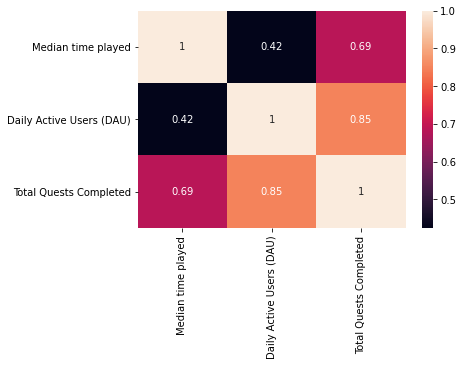

In [10]:
# Correlation between the columns
corr = XYZ_DAU_data.corr()
# For easier understanding
sns.heatmap(corr,annot=True) 

<AxesSubplot:>

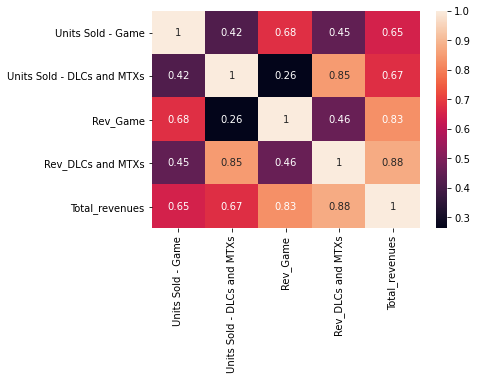

In [11]:
# Correlation between the columns
corr = XYZ_Revenue_data.corr()
# For easier understanding
sns.heatmap(corr,annot=True) 

In [12]:
# Date

# Create Year and Month columns and removing day in date column
XYZ_DAU_data['Year']  = XYZ_DAU_data['Date'].apply(lambda x: int(str(x)[:4]))
XYZ_DAU_data['Month'] = XYZ_DAU_data['Date'].apply(lambda x: int(str(x)[5:7]))
XYZ_DAU_data['Date'] = XYZ_DAU_data['Date'].apply(lambda x: str(x)[:7])

XYZ_Revenue_data['Year']  = XYZ_Revenue_data['Week_Start'].apply(lambda x: int(str(x)[:4]))
XYZ_Revenue_data['Month'] = XYZ_Revenue_data['Week_Start'].apply(lambda x: int(str(x)[5:7]))
XYZ_Revenue_data['Date'] = XYZ_Revenue_data['Week_Start'].apply(lambda x: str(x)[:7])
XYZ_Revenue_data.drop(['Week_Start'],axis = 1, inplace = True)
XYZ_Revenue_data.head()

,Units Sold - Game,Units Sold - DLCs and MTXs,Rev_Game,Rev_DLCs and MTXs,Total_revenues,Year,Month,Date
0,246968,61742.0,4914663.2,558392.800000,5.473056e+06,2026,2,2026-02
1,161529,42939.0,3214427.1,391750.900000,3.606178e+06,2026,2,2026-02
2,136517,40778.0,2716688.3,368795.011474,3.085483e+06,2026,2,2026-02
3,84750,26764.0,1686525.0,280110.000000,1.966635e+06,2026,2,2026-02
4,72621,25516.0,1445157.9,262348.100000,1.707506e+06,2026,3,2026-03


You can see from the below graphs, compared to 2026, even though the daily active users (DAU), Quests and Median Time Played has increased by almost 25% in 2027, the sales of  game units dropped by 66%, microtransactions(MTX’s) and Downloadable contents(DLC’s) dropped by 17% and Revenue has dropped by almost 63%.

<AxesSubplot:xlabel='Year', ylabel='Total_revenues'>

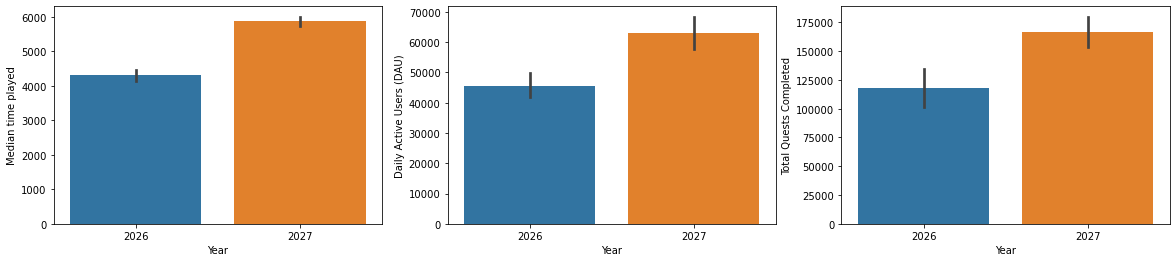

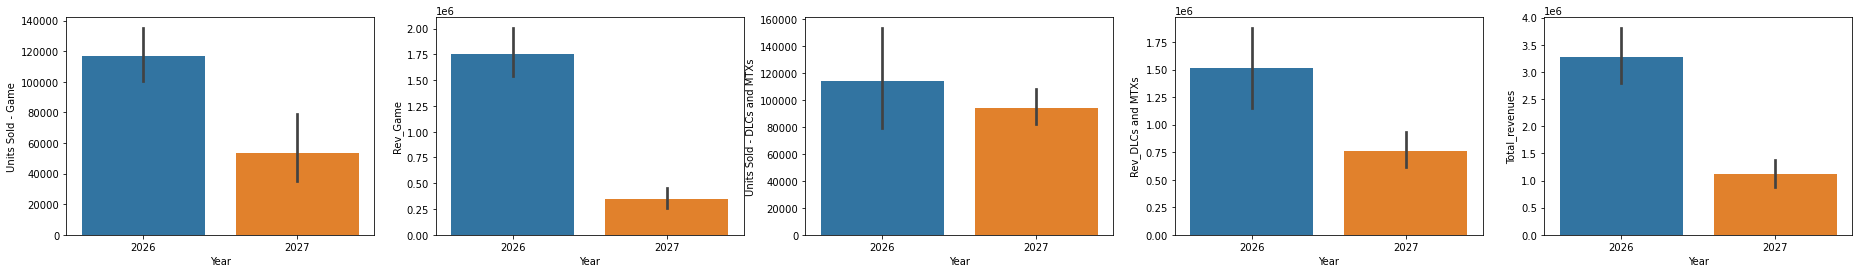

In [13]:
# yearly DAU analysis
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(20,4))
sns.barplot(x='Year', y=('Median time played'), data=XYZ_DAU_data, ax=axis1)
sns.barplot(x='Year', y='Daily Active Users (DAU)', data=XYZ_DAU_data, ax=axis2)
sns.barplot(x='Year', y='Total Quests Completed', data=XYZ_DAU_data, ax=axis3)

# yearly Revenue analysis
fig, (axis4,axis5,axis6,axis7,axis8) = plt.subplots(1,5,figsize=(32,4))
sns.barplot(x='Year', y='Units Sold - Game', data=XYZ_Revenue_data, ax=axis4)
sns.barplot(x='Year', y='Rev_Game', data=XYZ_Revenue_data, ax=axis5)
sns.barplot(x='Year', y='Units Sold - DLCs and MTXs', data=XYZ_Revenue_data, ax=axis6)
sns.barplot(x='Year', y='Rev_DLCs and MTXs', data=XYZ_Revenue_data, ax=axis7)
sns.barplot(x='Year', y='Total_revenues', data=XYZ_Revenue_data, ax=axis8)

<AxesSubplot:xlabel='Year', ylabel='Total_revenues'>

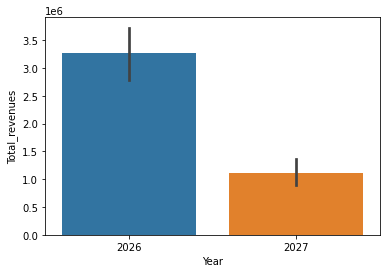

In [23]:
sns.barplot(x='Year', y='Total_revenues', data=XYZ_Revenue_data)

In [14]:
#dropping year & month columns
XYZ_DAU_data.drop(['Year','Month'],axis = 1, inplace = True)

In [15]:
#combining both the datasets
combined_data = pd.merge(XYZ_DAU_data,XYZ_Revenue_data,on = 'Date')
combined_data.head()

,Date,Median time played,Daily Active Users (DAU),Total Quests Completed,Units Sold - Game,Units Sold - DLCs and MTXs,Rev_Game,Rev_DLCs and MTXs,Total_revenues,Year,Month
0,2026-02,2665.02,75195.0,84519.0,246968,61742.0,4914663.2,558392.800000,5.473056e+06,2026,2
1,2026-02,2665.02,75195.0,84519.0,161529,42939.0,3214427.1,391750.900000,3.606178e+06,2026,2
2,2026-02,2665.02,75195.0,84519.0,136517,40778.0,2716688.3,368795.011474,3.085483e+06,2026,2
3,2026-02,2665.02,75195.0,84519.0,84750,26764.0,1686525.0,280110.000000,1.966635e+06,2026,2
4,2026-02,2641.02,73607.0,80871.0,246968,61742.0,4914663.2,558392.800000,5.473056e+06,2026,2


<AxesSubplot:>

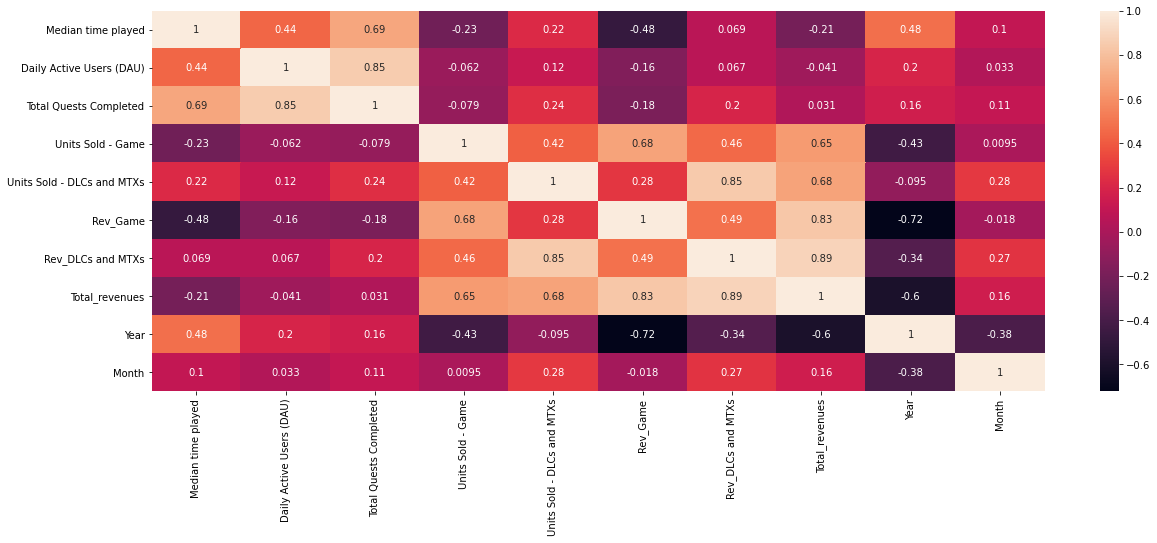

In [16]:
# Correlation between the columns
corr = combined_data.corr()
# For easier understanding
plt.figure( figsize =(20,7))
sns.heatmap(corr,annot=True)

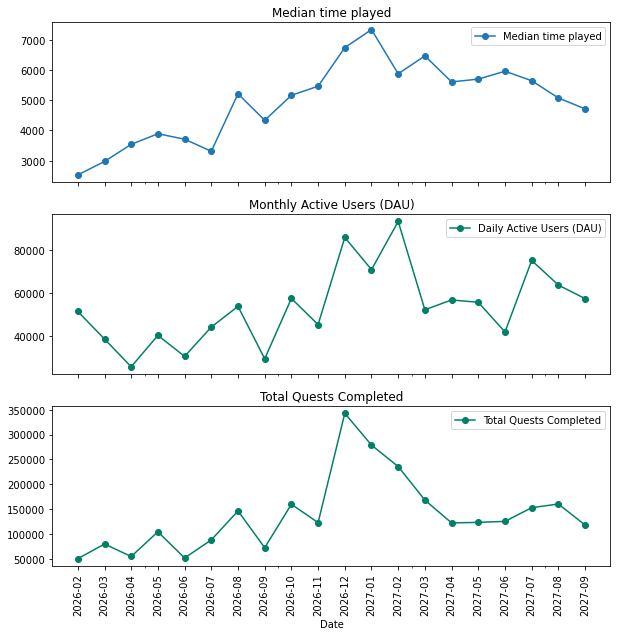

In [17]:
# Combined data group by month&Year('Date') and get average and percent change
avg_monthly_time  = combined_data.groupby('Date')["Median time played"].mean()
avg_monthly_Active_Users = combined_data.groupby('Date')["Daily Active Users (DAU)"].mean()
avg_Quests_Completed = combined_data.groupby('Date')["Total Quests Completed"].mean()
avg_games_sold  = combined_data.groupby('Date')["Units Sold - Game"].mean()
avg_DLC_MTX_sold = combined_data.groupby('Date')["Units Sold - DLCs and MTXs"].mean()
avg_Rev_game  = combined_data.groupby('Date')["Rev_Game"].mean()
avg_Rev_DLC_MTX= combined_data.groupby('Date')["Rev_DLCs and MTXs"].mean()
avg_Rev_Total= combined_data.groupby('Date')["Total_revenues"].mean()


fig, (axis1,axis2,axis3) = plt.subplots(3,1,sharex=True,figsize=(10,10))

# plot average sales over time(year-month)
ax1 = avg_monthly_time.plot(legend=True,ax=axis1,marker='o',title="Median time played")
ax1.set_xticks(range(len(avg_monthly_time)))
ax1.set_xticklabels(avg_monthly_time.index.tolist(), rotation=90)
# plot precent change over time(year-month)
ax2 = avg_monthly_Active_Users.plot(legend=True,ax=axis2,marker='o',rot=90,colormap="summer",title="Monthly Active Users (DAU)")
ax3 = avg_Quests_Completed.plot(legend=True,ax=axis3,marker='o',rot=90,colormap="summer",title="Total Quests Completed")

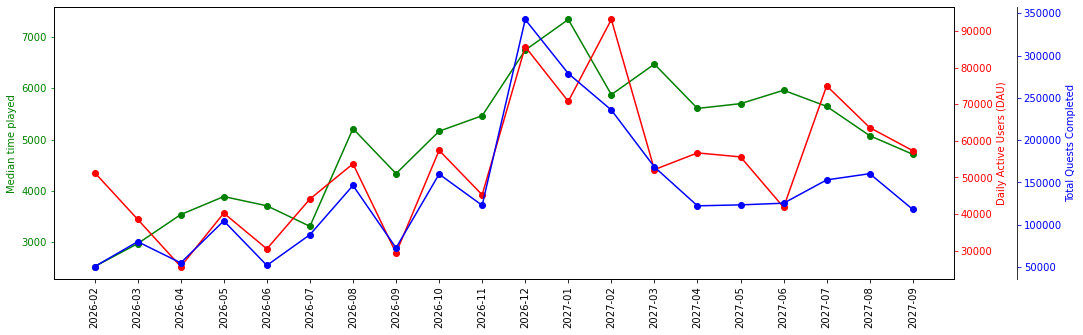

In [25]:
import numpy as np

fig, ax = plt.subplots(figsize=(20, 5))
plt.xticks(range(20),labels = combined_data['Date'].unique(), rotation='vertical')

# Twin the x-axis twice to make independent y-axes.
axes = [ax, ax.twinx(), ax.twinx()]

# Make some space on the right side for the extra y-axis.
fig.subplots_adjust(right=0.75)

# Move the last y-axis spine over to the right by 7% of the width of the axes
axes[-1].spines['right'].set_position(('axes', 1.07))

# To make the border of the right-most axis visible, we need to turn the frame
# on. This hides the other plots, however, so we need to turn its fill off.
axes[-1].set_frame_on(True)
axes[-1].patch.set_visible(False)

# And finally we get to plot things...
colors = ('Green', 'Red', 'Blue')
labels = ('Median time played',"Daily Active Users (DAU)","Total Quests Completed")
vals = (avg_monthly_time,avg_monthly_Active_Users,avg_Quests_Completed)
for val,ax,color,label in zip(vals,axes,colors,labels):
    ax.plot(val, marker='o', color=color)
    #avg_monthly_time.plot(marker='o',title="Median time played",color='b')
    ax.set_ylabel(label,color=color)
    ax.tick_params(axis='y',colors=color)
plt.show()

#### As I don't have in-depth knowledge on how LiveOps or Campaigns are conducted, but you told that 'they attracts new players to the game, as well as keeping existing players engaged'. So, I am considering that they are conducted when there is an increase in all the three(time,users and quests) because any one of them may change due to other reasons that we may not be aware of. So, from the above graph we can clearly see that the campaigns are conducted in 5,8,10,12 (high spike) months of year 2026.

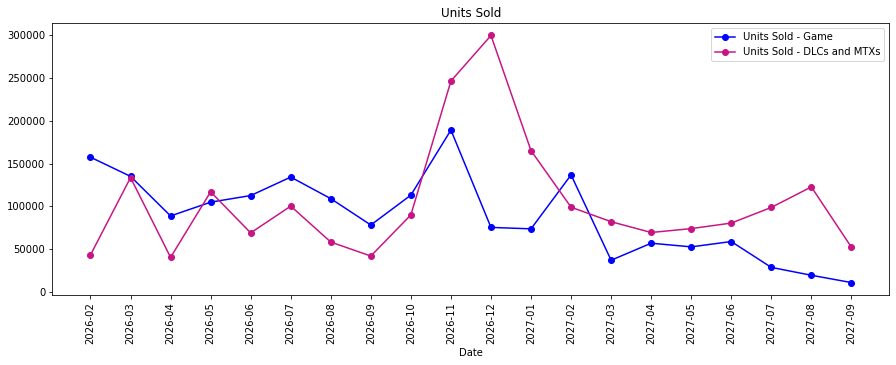

In [20]:
#avg_monthly_Active_Users.plot(secondary_y=True,legend=True,marker='o',title="Monthly Active Users (DAU)",color = 'gold')
avg_games_sold.plot(legend=True,marker='o',title="Units Sold - Game",color='b')
avg_DLC_MTX_sold.plot(legend=True,marker='o',title="Units Sold - DLCs and MTXs",color='mediumvioletred',figsize=(15,5))
plt.xticks(range(20),labels = combined_data['Date'].unique(),rotation='vertical')
plt.title('Units Sold')
plt.show()

#### If you see the above graphs, 5th and 10th month campaigns have worked well as the sales of Game and “DLC’s & MTX’s” have increased. In 12th month campaign the sales of “DLC’s & MTX’s” have increased while the sales of game dropped. In the 8th month campaign sales of both of them have dropped.

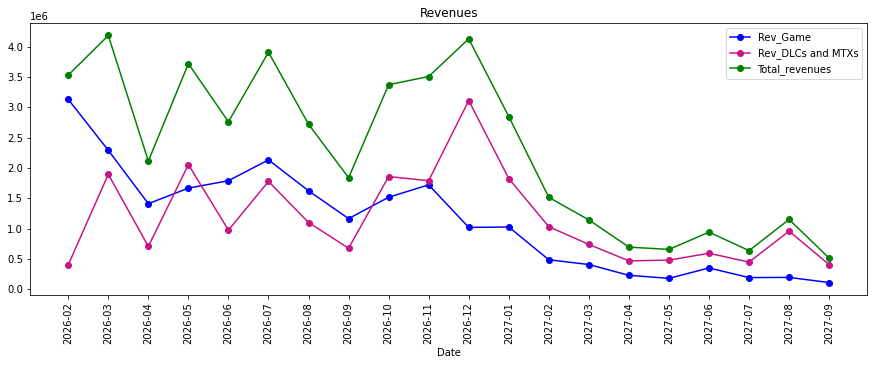

In [21]:
#avg_monthly_Active_Users.plot(secondary_y=True,legend=True,marker='o',title="Monthly Active Users (DAU)",color = 'gold')
avg_Rev_game.plot(legend=True,marker='o',title="Rev_Game",color='b')
avg_Rev_DLC_MTX.plot(legend=True,marker='o',title="Rev_DLCs and MTXs",color='mediumvioletred')
avg_Rev_Total.plot(legend=True,marker='o',title="Total_revenues",color ='green',figsize=(15,5))
plt.xticks(range(20),labels = combined_data['Date'].unique(),rotation='vertical')
plt.title('Revenues')
plt.show()

#### From the above graphs we can clearly see that the 12th month has a large revenue spike of “DLC’s & MTX’s” and increase in Daily Active Users(DAU) due to Christmas & holidays 

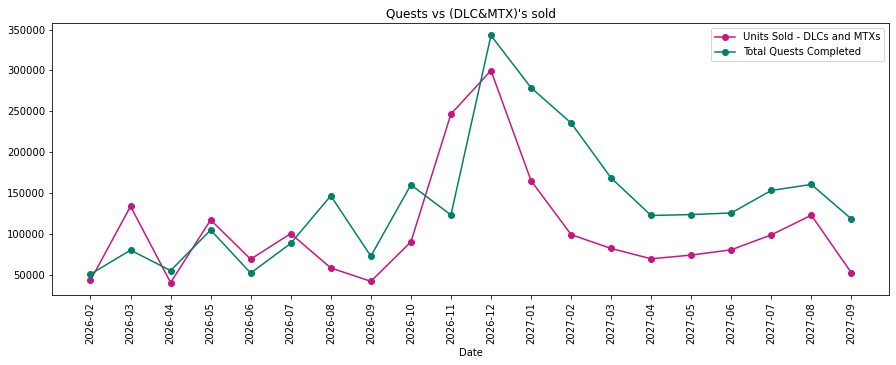

In [22]:
#avg_games_sold.plot(legend=True,marker='o',title="Units Sold - Game",color='b')
avg_DLC_MTX_sold.plot(legend=True,marker='o',title="Units Sold - DLCs and MTXs",color='mediumvioletred',figsize=(15,5))
avg_Quests_Completed.plot(legend=True,marker='o',rot=90,colormap="summer",title="Total Quests Completed")
plt.xticks(range(20),labels = combined_data['Date'].unique(),rotation='vertical')
plt.title("Quests vs (DLC&MTX)'s sold")
plt.show()

#### On a side note we can see that the Total Quests completed and DLC&MTX's sold are almost following the same trend  

#### Improvements that can be done: If we have the age and sex of the population we can understand more (for example if the majority of the population playing the games are in schools and colleges, during holidays the DAU will obviously increase.) 